<a href="https://colab.research.google.com/github/Ansalnakhan/projectansalna/blob/main/ansalnaSOHandRUL07final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1652]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [1653]:
import pandas as pd

In [1654]:
data=pd.read_csv("/content/B0007.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [1655]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


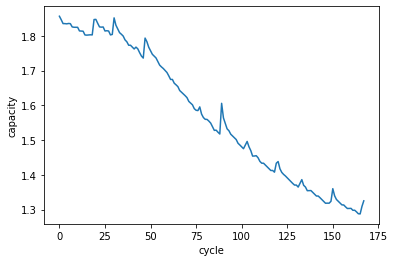

In [1656]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.ylabel('capacity')
plt.xlabel('cycle')
plt.show()

In [1657]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [1658]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

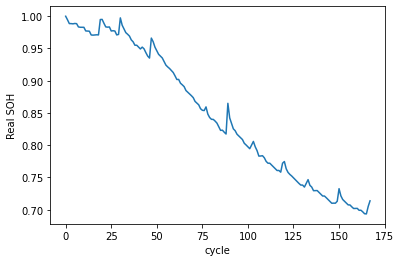

In [1659]:
plt.plot(range(len(soh)),soh)
plt.ylabel('Real SOH')
plt.xlabel('cycle')
plt.show()

In [1660]:
capacity=np.asarray(capacity)

In [1661]:
type(capacity)

numpy.ndarray

In [1662]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [1663]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [1664]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 0.5061
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0908
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0140
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0309
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0013


In [1665]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1666]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [1667]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 6ms/step


4.5797550639288894e-05

In [1668]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.007


In [1669]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.00459901]
R2_score:  0.9391490357336776


Text(0.5, 0, 'cycle')

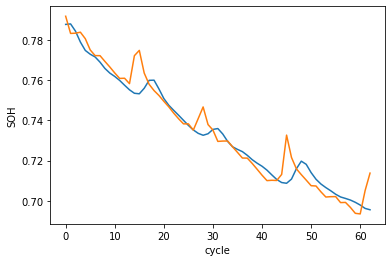

In [1670]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.ylabel('SOH')
plt.xlabel('cycle')

In [1671]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [1672]:
preds

array([[0.9543148 ],
       [0.95295334],
       [0.95272595],
       [0.95240706],
       [0.9510859 ],
       [0.94924986],
       [0.94811   ],
       [0.9473839 ],
       [0.9459116 ],
       [0.9439873 ],
       [0.942407  ],
       [0.94059443],
       [0.93858224],
       [0.93749446],
       [0.9373599 ],
       [0.9391687 ],
       [0.94522035],
       [0.9526668 ],
       [0.95519096],
       [0.95271033],
       [0.94968426],
       [0.9479133 ],
       [0.9461692 ],
       [0.9442222 ],
       [0.9426691 ],
       [0.9408855 ],
       [0.9408726 ],
       [0.9456579 ],
       [0.9507269 ],
       [0.9498669 ],
       [0.9452182 ],
       [0.9409828 ],
       [0.93773305],
       [0.9344131 ],
       [0.9307181 ],
       [0.92719615],
       [0.92446554],
       [0.92244846],
       [0.9207769 ],
       [0.9198074 ],
       [0.91898793],
       [0.91664606],
       [0.91275287],
       [0.9112678 ],
       [0.9164708 ],
       [0.9238616 ],
       [0.9250492 ],
       [0.920

Text(0.5, 0, 'cycle')

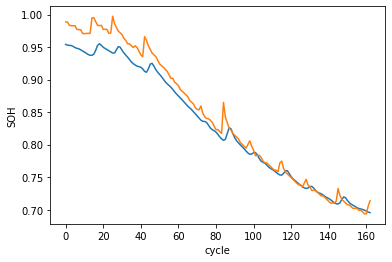

In [1673]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.ylabel('SOH')
plt.xlabel('cycle')

Predicting Capacity

In [1674]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [1675]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 1.9339
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.2110
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1069
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1606
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0288
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0651
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0313
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0114


In [1676]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1677]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 7ms/step


0.00022343645980237354

In [1678]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.015


In [1679]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01325904]
R2_score:  0.9138619109240034


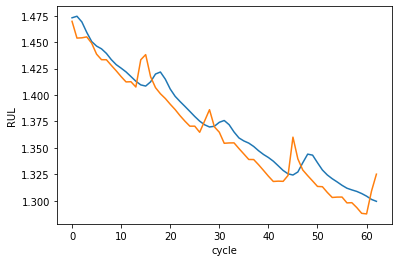

In [1680]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.ylabel('RUL')
plt.xlabel('cycle')
plt.show()


In [1681]:
preds = model.predict(X)

6/6 [==============================] - 0s 3ms/step


In [1682]:
preds

array([[1.7909667],
       [1.7877225],
       [1.7869717],
       [1.7865366],
       [1.7844236],
       [1.781047 ],
       [1.7785456],
       [1.7770854],
       [1.7746578],
       [1.7710913],
       [1.7679446],
       [1.7646278],
       [1.7608639],
       [1.7583784],
       [1.757801 ],
       [1.7603792],
       [1.7702268],
       [1.784304 ],
       [1.7912936],
       [1.7882435],
       [1.7821904],
       [1.7783679],
       [1.7751721],
       [1.7715375],
       [1.7684315],
       [1.7651637],
       [1.7642187],
       [1.7714833],
       [1.7815706],
       [1.7824337],
       [1.7746699],
       [1.7660291],
       [1.7596325],
       [1.7534301],
       [1.7465738],
       [1.7397634],
       [1.7342552],
       [1.7302268],
       [1.7269288],
       [1.724837 ],
       [1.7233092],
       [1.7195393],
       [1.712666 ],
       [1.7084727],
       [1.7157737],
       [1.7297083],
       [1.7347292],
       [1.7280955],
       [1.7179115],
       [1.7097645],


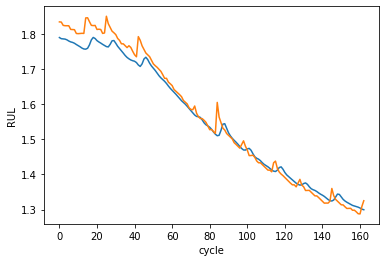

In [1683]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.ylabel('RUL')
plt.xlabel('cycle')
plt.show()